# Carbon Offset Registry Analysis (Alberta)

## Objective
The goal of this notebook is to explore and prepare Alberta carbon offset registry data
to understand supply dynamics, project characteristics, and how registry-level metrics
may relate to market price behavior at an aggregated level.

This analysis focuses on:
- Data quality assessment
- Feature engineering at a monthly level
- Exploratory relationships between supply-side metrics and price
> Note: Some runtime warnings appear during numerical operations due to
null values and coercion in the registry data. These are expected given
data quality constraints and do not affect downstream aggregated analysis.



## Data Loading & Initial Inspection



In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", 100)

DATA_DIR = Path("data")
REGISTRY_PATH = r"C:\Users\shoaib\combined_data.csv"
PRICE_PATH = r"C:\Users\shoaib\Desktop\strom futures\carbon_prices.xlsx"


In [207]:
df = pd.read_csv(REGISTRY_PATH)
price_data = pd.read_excel(PRICE_PATH)

print("Registry shape:", df.shape)
print("Price shape:", price_data.shape)

registry_df.head()


C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\272934667.py:1: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(REGISTRY_PATH)


Registry shape: (1048575, 21)
Price shape: (1800, 2)


,Registry,Project_Identifier,Project_Title,Emission_Offset_Project_Developer,Quantification_Protocol,Vintage,Serial_Start,Serial_End,Type,Quantity,Current_Owner,Facility,Emission_Offset_Status,Transaction_Id,Activity_Start,Offset_Start_Date,Offset_End_Date,Expiry_Date,Verifier_Company,Compliance_Year,Effective_Date
0,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2007.0,8626-3432-000-000-070-058,8626-3432-000-000-107-037,NaN,36980,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
1,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2006.0,8626-3432-000-000-055-706,8626-3432-000-000-070-057,NaN,14352,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
2,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2005.0,8626-3432-000-000-041-500,8626-3432-000-000-055-705,NaN,14206,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
3,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2004.0,8626-3432-000-000-013-653,8626-3432-000-000-027-541,NaN,13889,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
4,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2003.0,8626-3432-000-000-027-542,8626-3432-000-000-041-499,NaN,13958,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024


In [209]:
df.head()

,Registry,Project_Identifier,Project_Title,Emission_Offset_Project_Developer,Quantification_Protocol,Vintage,Serial_Start,Serial_End,Type,Quantity,Current_Owner,Facility,Emission_Offset_Status,Transaction_Id,Activity_Start,Offset_Start_Date,Offset_End_Date,Expiry_Date,Verifier_Company,Compliance_Year,Effective_Date
0,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2007.0,8626-3432-000-000-070-058,8626-3432-000-000-107-037,NaN,36980,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
1,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2006.0,8626-3432-000-000-055-706,8626-3432-000-000-070-057,NaN,14352,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
2,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2005.0,8626-3432-000-000-041-500,8626-3432-000-000-055-705,NaN,14206,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
3,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2004.0,8626-3432-000-000-013-653,8626-3432-000-000-027-541,NaN,13889,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024
4,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2003.0,8626-3432-000-000-027-542,8626-3432-000-000-041-499,NaN,13958,Heartland Generation Ltd.,NaN,Revoked,NaN,NaN,1/1/2002,12/31/2007,7/5/2021,NaN,NaN,1/1/2024


In [211]:
# Checking data types of each column
print("Data Types:\n", df.dtypes)

# Check for missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

Data Types:
 Registry                              object
Project_Identifier                    object
Project_Title                         object
Emission_Offset_Project_Developer     object
Quantification_Protocol               object
Vintage                              float64
Serial_Start                          object
Serial_End                            object
Type                                  object
Quantity                               int64
Current_Owner                         object
Facility                              object
Emission_Offset_Status                object
Transaction_Id                       float64
Activity_Start                        object
Offset_Start_Date                     object
Offset_End_Date                       object
Expiry_Date                           object
Verifier_Company                      object
Compliance_Year                      float64
Effective_Date                        object
dtype: object

Missing Values:
 Registry  

Columns with extremely high missingness (>80%) are evaluated carefully.
If they do not provide analytical value, they are excluded to reduce noise
and improve downstream feature reliability.


In [213]:
# Defining a threshold for dropping columns with mostly null values (e.g., 70% null)
threshold = 0.8 * len(df)

# Dropping columns with more than 70% missing values
df_cleaned = df.dropna(thresh=threshold, axis=1)

print("\nColumns retained:\n", df_cleaned.columns)


Columns retained:
 Index(['Registry', 'Project_Identifier', 'Project_Title',
       'Emission_Offset_Project_Developer', 'Quantification_Protocol',
       'Vintage', 'Serial_Start', 'Serial_End', 'Quantity', 'Current_Owner',
       'Emission_Offset_Status', 'Offset_Start_Date', 'Offset_End_Date',
       'Expiry_Date', 'Effective_Date'],
      dtype='object')


## Date Standardization

All relevant date fields are converted to datetime format to enable
time-based feature engineering and monthly aggregation. Invalid or
malformed dates are coerced to null values.


In [222]:

date_columns = [
    "Offset_Start_Date",
    "Offset_End_Date",
    "Expiry_Date",
    "Effective_Date"
]

for col in date_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")
        min_date = df_cleaned[col].min()
        max_date = df_cleaned[col].max()
        print(f"{col} - Start date: {min_date}, End date: {max_date}")
    else:
        print(f"{col} not found in the dataset.")

print("Updated data types:")
print(df_cleaned[date_columns].dtypes)

print("\nMissing values after conversion:")
print(df_cleaned[date_columns].isna().sum())


C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\2200967450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")
C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\2200967450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors="coerce")
C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\2200967450.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

Offset_Start_Date - Start date: 2002-01-01 00:00:00, End date: 2024-05-28 00:00:00
Offset_End_Date - Start date: 2003-12-31 00:00:00, End date: 2039-02-25 00:00:00
Expiry_Date - Start date: 2019-07-05 00:00:00, End date: 2033-07-05 00:00:00
Effective_Date - Start date: 2024-01-01 00:00:00, End date: 2024-08-02 00:00:00
Updated data types:
Offset_Start_Date    datetime64[ns]
Offset_End_Date      datetime64[ns]
Expiry_Date          datetime64[ns]
Effective_Date       datetime64[ns]
dtype: object

Missing values after conversion:
Offset_Start_Date        0
Offset_End_Date          0
Expiry_Date          20751
Effective_Date           0
dtype: int64


In [224]:
df_cleaned.head()

,Registry,Project_Identifier,Project_Title,Emission_Offset_Project_Developer,Quantification_Protocol,Vintage,Serial_Start,Serial_End,Quantity,Current_Owner,Emission_Offset_Status,Offset_Start_Date,Offset_End_Date,Expiry_Date,Effective_Date
0,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2007.0,8626-3432-000-000-070-058,8626-3432-000-000-107-037,36980,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01
1,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2006.0,8626-3432-000-000-055-706,8626-3432-000-000-070-057,14352,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01
2,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2005.0,8626-3432-000-000-041-500,8626-3432-000-000-055-705,14206,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01
3,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2004.0,8626-3432-000-000-013-653,8626-3432-000-000-027-541,13889,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01
4,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2003.0,8626-3432-000-000-027-542,8626-3432-000-000-041-499,13958,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01


## Feature Engineering
Key derived variables are created to capture project maturity, supply concentration,
and temporal dynamics relevant to carbon credit availability.


In [227]:
# Current year for calculations
current_year = datetime.now().year

# 1. Offset Age (Offset_Age): Age of the offset since its Vintage year.
df_cleaned['Offset_Age'] = current_year - df_cleaned['Vintage']

C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\1978769079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Offset_Age'] = current_year - df_cleaned['Vintage']


In [229]:
# 2. Vintage Grouping (Vintage_Group): Create categorical groups based on Vintage.
def vintage_group(vintage):
    if 2000 <= vintage <= 2010:
        return "2000-2010"
    elif 2011 <= vintage <= 2020:
        return "2011-2020"
    elif 2021 <= vintage <= 2030:
        return "2021-2030"
    else:
        return "Other"

df_cleaned['Vintage_Group'] = df_cleaned['Vintage'].apply(vintage_group)

C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\1750021457.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Vintage_Group'] = df_cleaned['Vintage'].apply(vintage_group)


In [230]:
# 3. Yearly Supply Based on Vintage (Supply_Yearly_Vintage): Aggregate Quantity by Vintage year.
yearly_supply = df_cleaned.groupby('Vintage')['Quantity'].sum().reset_index()
yearly_supply.columns = ['Vintage', 'Supply_Yearly_Vintage']
df_cleaned = df_cleaned.merge(yearly_supply, on='Vintage', how='left')
# 4. Time Until Expiry (Time_Until_Expiry): Calculate the time remaining until Expiry Date.
df_cleaned['Expiry_Date'] = pd.to_datetime(df_cleaned['Expiry_Date'], errors='coerce')  # Convert to datetime
df_cleaned['Time_Until_Expiry'] = (df_cleaned['Expiry_Date'] - datetime.now()).dt.days

In [232]:
# 5. Project Duration (Project_Duration): Calculate the duration of the project.
df_cleaned['Offset_Start_Date'] = pd.to_datetime(df_cleaned['Offset_Start_Date'], errors='coerce')
df_cleaned['Offset_End_Date'] = pd.to_datetime(df_cleaned['Offset_End_Date'], errors='coerce')
df_cleaned['Project_Duration'] = (df_cleaned['Offset_End_Date'] - df_cleaned['Offset_Start_Date']).dt.days

In [235]:
# 6. Active Status Indicator (Is_Active): Binary indicator for active offsets.
df_cleaned['Is_Active'] = df_cleaned['Emission_Offset_Status'].apply(lambda x: 1 if x != "Revoked" else 0)

# 7. Quantity by Project (Quantity_Per_Project): Average quantity per project.
project_quantity = df_cleaned.groupby('Project_Title')['Quantity'].mean().reset_index()
project_quantity.columns = ['Project_Title', 'Quantity_Per_Project']
df = df_cleaned.merge(project_quantity, on='Project_Title', how='left')

In [236]:
df.head()

,Registry,Project_Identifier,Project_Title,Emission_Offset_Project_Developer,Quantification_Protocol,Vintage,Serial_Start,Serial_End,Quantity,Current_Owner,Emission_Offset_Status,Offset_Start_Date,Offset_End_Date,Expiry_Date,Effective_Date,Offset_Age,Vintage_Group,Supply_Yearly_Vintage,Time_Until_Expiry,Project_Duration,Is_Active,Quantity_Per_Project
0,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2007.0,8626-3432-000-000-070-058,8626-3432-000-000-107-037,36980,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,19.0,2000-2010,561916815.0,-1670.0,2190,0,17839.5
1,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2006.0,8626-3432-000-000-055-706,8626-3432-000-000-070-057,14352,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,20.0,2000-2010,480362291.0,-1670.0,2190,0,17839.5
2,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2005.0,8626-3432-000-000-041-500,8626-3432-000-000-055-705,14206,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,21.0,2000-2010,403567839.0,-1670.0,2190,0,17839.5
3,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2004.0,8626-3432-000-000-013-653,8626-3432-000-000-027-541,13889,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,22.0,2000-2010,277034982.0,-1670.0,2190,0,17839.5
4,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2003.0,8626-3432-000-000-027-542,8626-3432-000-000-041-499,13958,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,23.0,2000-2010,220012992.0,-1670.0,2190,0,17839.5


## Monthly Aggregation of Registry Data

Registry data is event- and project-level, while market prices exist at a
market-time level. To ensure valid analysis, registry data is aggregated
to a monthly level before comparison with prices.


In [240]:
# 8. Monthly Offset Counts or Quantity (Monthly_Offset_Quantity): Monthly aggregate of Quantity.
df['Effective_Date'] = pd.to_datetime(df['Effective_Date'], errors='coerce')
df['YearMonth'] = df['Effective_Date'].dt.to_period('M')
monthly_offset_quantity = df.groupby('YearMonth')['Quantity'].sum().reset_index()
monthly_offset_quantity.columns = ['YearMonth', 'Monthly_Offset_Quantity']
df = df.merge(monthly_offset_quantity, on='YearMonth', how='left')

# 9. Lagged Supply Variables (Lag_Quantity): Lagged monthly quantity for time series analysis.
df['Lag_Quantity'] = df['Monthly_Offset_Quantity'].shift(1)

# 10. Ownership Concentration (Ownership_Share): Percentage share of Quantity held by each owner.
total_quantity = df['Quantity'].sum()
ownership_quantity = df.groupby('Current_Owner')['Quantity'].sum().reset_index()
ownership_quantity['Ownership_Share'] = (ownership_quantity['Quantity'] / total_quantity) * 100
df = df.merge(ownership_quantity[['Current_Owner', 'Ownership_Share']], on='Current_Owner', how='left')

# View the DataFrame with new derived variables
print(df.head())

  Registry Project_Identifier                 Project_Title  \
0     AEOR          8626-3432  2007 Tillage Auction Project   
1     AEOR          8626-3432  2007 Tillage Auction Project   
2     AEOR          8626-3432  2007 Tillage Auction Project   
3     AEOR          8626-3432  2007 Tillage Auction Project   
4     AEOR          8626-3432  2007 Tillage Auction Project   

    Emission_Offset_Project_Developer     Quantification_Protocol  Vintage  \
0  Emission Credits Corporation (ECC)  Tillage System Management    2007.0   
1  Emission Credits Corporation (ECC)  Tillage System Management    2006.0   
2  Emission Credits Corporation (ECC)  Tillage System Management    2005.0   
3  Emission Credits Corporation (ECC)  Tillage System Management    2004.0   
4  Emission Credits Corporation (ECC)  Tillage System Management    2003.0   

                Serial_Start                 Serial_End  Quantity  \
0  8626-3432-000-000-070-058  8626-3432-000-000-107-037     36980   
1  8626-3432-0

In [242]:
df.head()

,Registry,Project_Identifier,Project_Title,Emission_Offset_Project_Developer,Quantification_Protocol,Vintage,Serial_Start,Serial_End,Quantity,Current_Owner,Emission_Offset_Status,Offset_Start_Date,Offset_End_Date,Expiry_Date,Effective_Date,Offset_Age,Vintage_Group,Supply_Yearly_Vintage,Time_Until_Expiry,Project_Duration,Is_Active,Quantity_Per_Project,YearMonth,Monthly_Offset_Quantity,Lag_Quantity,Ownership_Share
0,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2007.0,8626-3432-000-000-070-058,8626-3432-000-000-107-037,36980,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,19.0,2000-2010,561916815.0,-1670.0,2190,0,17839.5,2024-01,2614948069,NaN,8.778684
1,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2006.0,8626-3432-000-000-055-706,8626-3432-000-000-070-057,14352,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,20.0,2000-2010,480362291.0,-1670.0,2190,0,17839.5,2024-01,2614948069,2.614948e+09,8.778684
2,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2005.0,8626-3432-000-000-041-500,8626-3432-000-000-055-705,14206,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,21.0,2000-2010,403567839.0,-1670.0,2190,0,17839.5,2024-01,2614948069,2.614948e+09,8.778684
3,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2004.0,8626-3432-000-000-013-653,8626-3432-000-000-027-541,13889,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,22.0,2000-2010,277034982.0,-1670.0,2190,0,17839.5,2024-01,2614948069,2.614948e+09,8.778684
4,AEOR,8626-3432,2007 Tillage Auction Project,Emission Credits Corporation (ECC),Tillage System Management,2003.0,8626-3432-000-000-027-542,8626-3432-000-000-041-499,13958,Heartland Generation Ltd.,Revoked,2002-01-01,2007-12-31,2021-07-05,2024-01-01,23.0,2000-2010,220012992.0,-1670.0,2190,0,17839.5,2024-01,2614948069,2.614948e+09,8.778684


In [87]:
print("Columns before cleanup:")
print(df.columns.tolist())

# Identify Supply_Yearly_Vintage variants
supply_cols = [c for c in df.columns if c.startswith("Supply_Yearly_Vintage")]

print("\nDetected Supply_Yearly_Vintage columns:", supply_cols)

if len(supply_cols) > 1:
    # Prefer '_x' if present, otherwise keep the first one
    preferred_col = (
        "Supply_Yearly_Vintage_x"
        if "Supply_Yearly_Vintage_x" in supply_cols
        else supply_cols[0]
    )

    df["Supply_Yearly_Vintage"] = df[preferred_col]

    # Drop all other variants
    cols_to_drop = [c for c in supply_cols if c != preferred_col]
    df = df.drop(columns=cols_to_drop, errors="ignore")

elif len(supply_cols) == 1:
    # Rename to standard name if needed
    if supply_cols[0] != "Supply_Yearly_Vintage":
        df = df.rename(columns={supply_cols[0]: "Supply_Yearly_Vintage"})

derived_columns = [
    "Supply_Yearly_Vintage",
    "Time_Until_Expiry",
    "Project_Duration",
    "Is_Active",
    "Quantity_Per_Project",
    "Monthly_Offset_Quantity",
    "Lag_Quantity",
    "Ownership_Share",
]

# Keep only derived columns that actually exist
derived_columns = [c for c in derived_columns if c in df.columns]

original_columns = [c for c in df.columns if c not in derived_columns]

df = df[original_columns + derived_columns]


if "Lag_Quantity" in df.columns:
    df["Lag_Quantity"] = df["Lag_Quantity"].fillna(0)

print("\nFinal columns:")
print(df.columns.tolist())

print("\nPreview:")
print(df.head())



Columns before cleanup:
['Registry', 'Project_Identifier', 'Project_Title', 'Emission_Offset_Project_Developer', 'Quantification_Protocol', 'Vintage', 'Serial_Start', 'Serial_End', 'Quantity', 'Current_Owner', 'Emission_Offset_Status', 'Offset_Start_Date', 'Offset_End_Date', 'Expiry_Date', 'Effective_Date', 'Offset_Age', 'Vintage_Group', 'Supply_Yearly_Vintage', 'Time_Until_Expiry', 'Project_Duration', 'Is_Active', 'Quantity_Per_Project', 'YearMonth', 'Monthly_Offset_Quantity', 'Lag_Quantity', 'Ownership_Share']

Detected Supply_Yearly_Vintage columns: ['Supply_Yearly_Vintage']

Final columns:
['Registry', 'Project_Identifier', 'Project_Title', 'Emission_Offset_Project_Developer', 'Quantification_Protocol', 'Vintage', 'Serial_Start', 'Serial_End', 'Quantity', 'Current_Owner', 'Emission_Offset_Status', 'Offset_Start_Date', 'Offset_End_Date', 'Expiry_Date', 'Effective_Date', 'Offset_Age', 'Vintage_Group', 'YearMonth', 'Supply_Yearly_Vintage', 'Time_Until_Expiry', 'Project_Duration', 'Is_

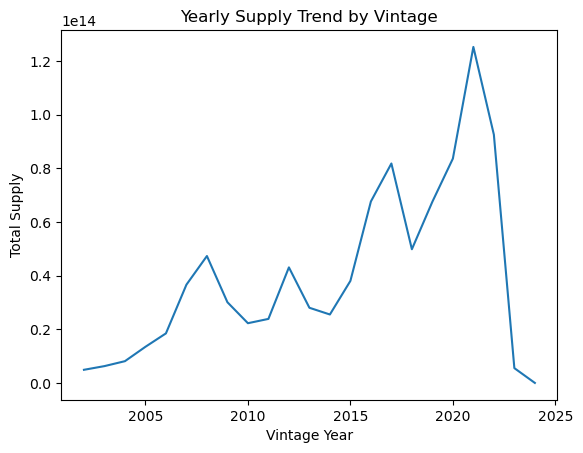

In [244]:
import matplotlib.pyplot as plt

# Group by Vintage year and plot the supply trend
supply_trend = df.groupby('Vintage')['Supply_Yearly_Vintage'].sum()
supply_trend.plot(kind='line', title='Yearly Supply Trend by Vintage')
plt.xlabel('Vintage Year')
plt.ylabel('Total Supply')
plt.show()


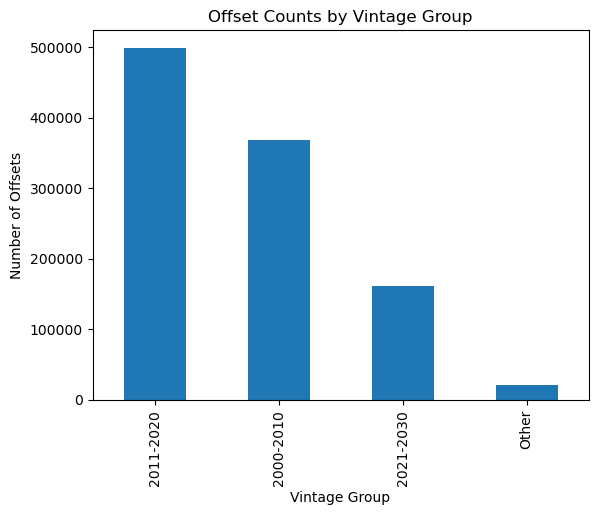

In [246]:
# Count the number of offsets in each Vintage Group
vintage_group_counts = df['Vintage_Group'].value_counts()
vintage_group_counts.plot(kind='bar', title='Offset Counts by Vintage Group')
plt.xlabel('Vintage Group')
plt.ylabel('Number of Offsets')
plt.show()


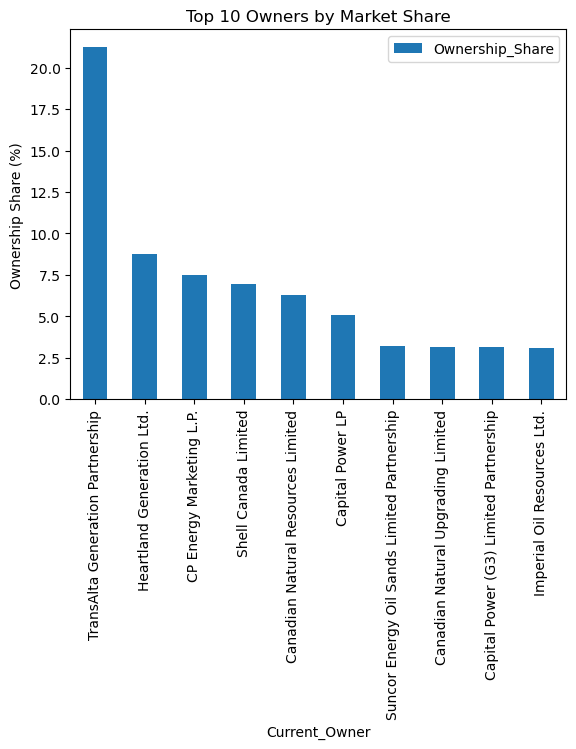

In [248]:
ownership_share = df[['Current_Owner', 'Ownership_Share']].drop_duplicates()
ownership_share = ownership_share.sort_values(by='Ownership_Share', ascending=False).head(10)  # Top 10 owners
ownership_share.plot(kind='bar', x='Current_Owner', y='Ownership_Share', title='Top 10 Owners by Market Share')
plt.ylabel('Ownership Share (%)')
plt.show()


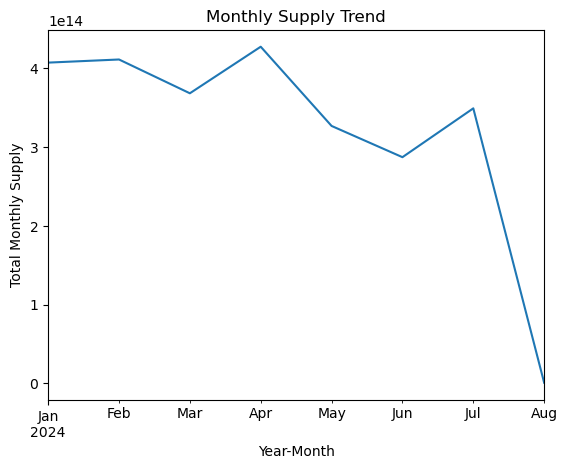

In [250]:
monthly_trend = df.groupby('YearMonth')['Monthly_Offset_Quantity'].sum()
monthly_trend.plot(kind='line', title='Monthly Supply Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Monthly Supply')
plt.show()


In [252]:
df['Is_Active'].value_counts()

Is_Active
1    1011129
0      37446
Name: count, dtype: int64

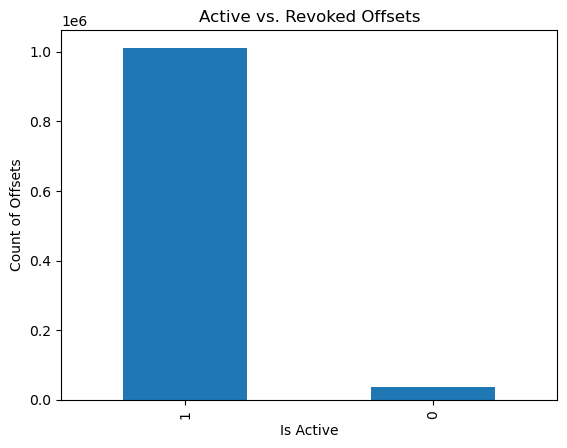

In [254]:
active_status_counts = df['Is_Active'].value_counts()
active_status_counts.plot(kind='bar', title='Active vs. Revoked Offsets')
plt.xlabel('Is Active')
plt.ylabel('Count of Offsets')
plt.show()


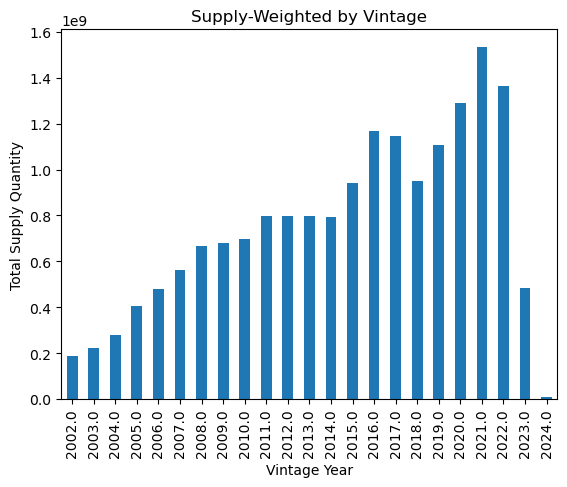

In [256]:
vintage_weighted_supply = df.groupby('Vintage')['Quantity'].sum()
vintage_weighted_supply.plot(kind='bar', title='Supply-Weighted by Vintage')
plt.xlabel('Vintage Year')
plt.ylabel('Total Supply Quantity')
plt.show()


## Seasonality Assessment of Carbon Credit Prices

Before selecting a forecasting model, the price series is examined for the presence
of trend and seasonal patterns. Understanding whether carbon credit prices exhibit
consistent seasonal behavior helps determine whether a seasonal or non-seasonal
time-series model is appropriate.

Seasonal-Trend decomposition is used to separate the observed price series into
trend, seasonal, and residual components, providing insight into the dominant
drivers of price movement.


In [269]:
import pandas as pd

# Load the price data
price_data = pd.read_excel("C:/Users/shoaib/Desktop/strom futures/carbon_prices.xlsx")

# Displaying the first few rows to understand its structure
print(price_data.head())


    DateTime  TIER Carbon Credit (CAD)
0 2019-01-02                     25.00
1 2019-01-03                     24.98
2 2019-01-04                     24.96
3 2019-01-07                     24.94
4 2019-01-08                     24.92


In [270]:
# Converting Date column in price data to datetime format
price_data['Date'] = pd.to_datetime(price_data['DateTime'], errors='coerce')

In [273]:
price_data.count()

DateTime                    1800
TIER Carbon Credit (CAD)    1800
Date                        1800
dtype: int64

In [275]:
price_ts = price_data.copy()

price_ts["DateTime"] = pd.to_datetime(price_ts["DateTime"])
price_ts = price_ts.set_index("DateTime").sort_index()

# Resample to monthly (ONE value per month)
price_monthly = price_ts["TIER Carbon Credit (CAD)"].resample("M").mean()

print(price_monthly.head())
print(price_monthly.shape)


DateTime
2019-01-31    24.790000
2019-02-28    24.380000
2019-03-31    21.500000
2019-04-30    19.597619
2019-05-31    22.058182
Freq: ME, Name: TIER Carbon Credit (CAD), dtype: float64
(68,)


C:\Users\shoaib\AppData\Local\Temp\ipykernel_23824\1911626514.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  price_monthly = price_ts["TIER Carbon Credit (CAD)"].resample("M").mean()


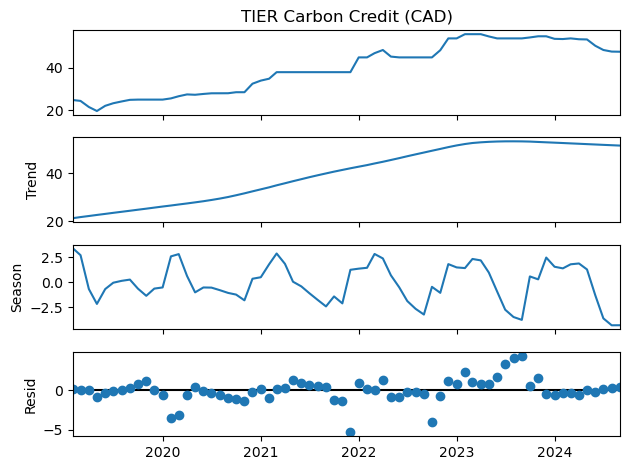

In [277]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(
    price_monthly,
    period=12,       
    robust=True
)

result = stl.fit()
result.plot()
plt.show()


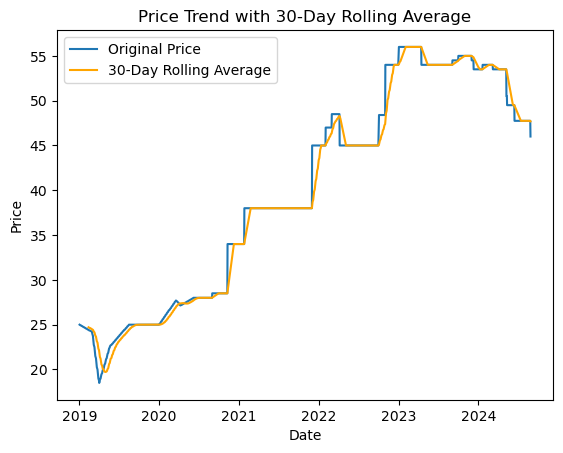

In [279]:
# Applying a 30-day rolling average to smooth prices in price_data
price_data['Rolling_Avg_30D'] = price_data['TIER Carbon Credit (CAD)'].rolling(window=30).mean()

# Plot to visualize trends with the rolling average
import matplotlib.pyplot as plt
plt.plot(price_data['Date'], price_data['TIER Carbon Credit (CAD)'], label='Original Price')
plt.plot(price_data['Date'], price_data['Rolling_Avg_30D'], label='30-Day Rolling Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Price Trend with 30-Day Rolling Average')
plt.show()



## Key Takeaways

- Registry data required careful aggregation to avoid artificial inflation of observations.
- Market price dynamics appear more strongly trend-driven than seasonally driven.
- Supply-side metrics provide contextual insight but do not fully explain price movements,
  motivating a separate time-series forecasting approach explored in the forecasting notebook.

Limitations include policy shocks, small monthly sample sizes, and the absence of
real-time demand-side transaction data.
